In [2]:
from oct2py import octave
octave.addpath('./src')
octave.addpath('./mnist')

In [85]:
!curl -O "https://lvdmaaten.github.io/tsne/code/mnist.zip"
!unzip "mnist.zip" -d mnist && rm "mnist.zip"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 29.4M  100 29.4M    0     0  5001k      0  0:00:06  0:00:06 --:--:-- 6578k
Archive:  mnist.zip
  inflating: mnist/mnist_test.mat    
  inflating: mnist/mnist_train.mat   


In [17]:
mnist_train = octave.load('mnist_train.mat')
mnist_test = octave.load('mnist_test.mat')
layers = [500, 500, 2000, 2]

In [25]:
# this part takes 2-6 hours
network, err = octave.train_par_tsne(mnist_train.train_X, mnist_train.train_labels,
                                     mnist_test.test_X, mnist_test.test_labels, layers, 'CD1');

In [51]:
mapped_train_X = octave.run_data_through_network(network, mnist_train.train_X)

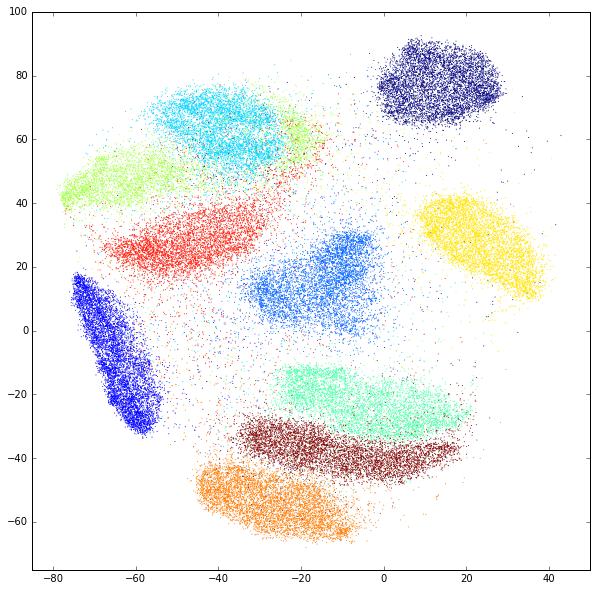

In [78]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.figure(figsize=(10,10))
plt.scatter(mapped_train_X[:,0], mapped_train_X[:,1], s=1, marker='o', linewidth=0, c=mnist_train.train_labels)
plt.xlim([-85,50])
plt.ylim([-75,100])
plt.show()